# Regularisation for NN

### General stuff

In [1]:
# moons dataset from scikit-learn
from sklearn.datasets import make_moons

# seaborn - a nice library to make your python plots look better
import seaborn as sb

# numpy and co
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

# some settings for seaborn
sb.set_style('whitegrid')
colors = sb.color_palette()
plt.rc('figure', figsize=(15.0, 10.0))

# keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import keras.regularizers as regularizers
from keras.callbacks import LambdaCallback
import keras


/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Using TensorFlow backend.


In [2]:
# using a built-in tool to create two interleaving moons
data = make_moons(noise=0.3, random_state=0)

In [3]:
# splitting classses in two arrays
up = []
down = []

for i in range(data[0].shape[0]):
    if (data[1][i] == 1):
        down.append(data[0][i])
    else:
        up.append(data[0][i])
        
up = np.asarray(up)
down = np.asarray(down)

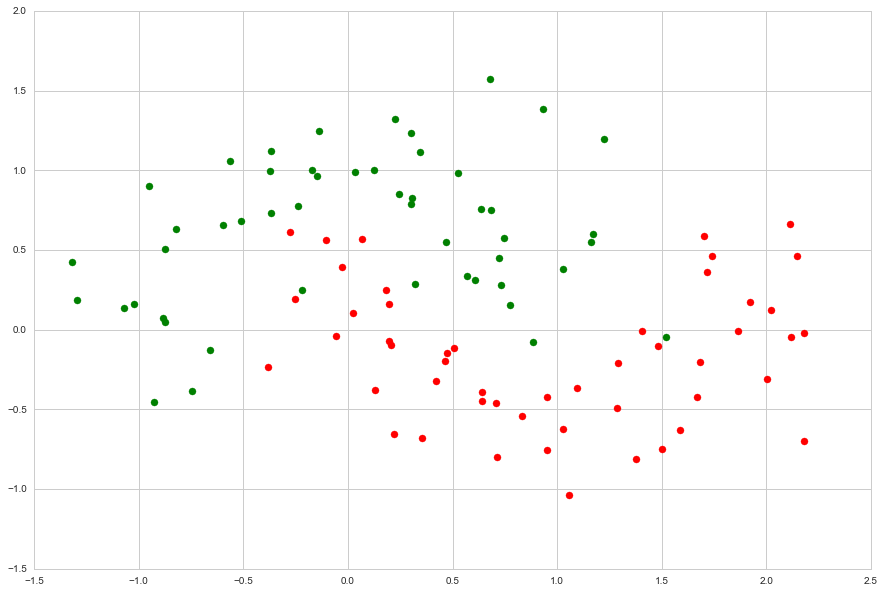

In [7]:
# plotting the two classes
plt.scatter(up[:,0], up[:,1], color="green", s=50)
plt.scatter(down[:,0], down[:,1], color="red", s=50)

### Neural network to split the moons

In [8]:
# implementing a NN in keras: 
# - input: (x,y) coordinates
# - 3 fully-connected layers (besides the input one)
# - no regularisation so far

model = Sequential()
model.add(Dense(20, activation='relu', input_dim=2))
model.add(Dense(30, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [9]:
# addin an optimiser and compiling the model
adam = keras.optimizers.adam(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [10]:
# plotting
def updatePlot(prediction):
    plt.contourf(xx,yy,prediction[:,0].reshape(xx.shape))
    plt.scatter(up[:,0], up[:,1], color="green", s=50)
    plt.scatter(down[:,0], down[:,1], color="red", s=50)
    
def plot_callback(func,p=5):
    def plot_epoch_end(epoch,logs):
        if epoch == 0 or (epoch+1) % p == 0:
            plt.clf(); func(); plt.title('epoch %d' % (epoch+1))
            display.clear_output(wait=True); display.display(plt.gcf())
    def clear(*args):
        plt.clf()
    return LambdaCallback(on_epoch_end=plot_epoch_end,on_train_end=clear)

In [11]:
# formatting the data for training and plotting
x = data[0]
y = keras.utils.to_categorical(data[1])

plot_step=.1
x_min, x_max = data[0][:,0].min() - 1, data[0][:, 1].max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

arr = np.c_[xx.ravel(), yy.ravel()]

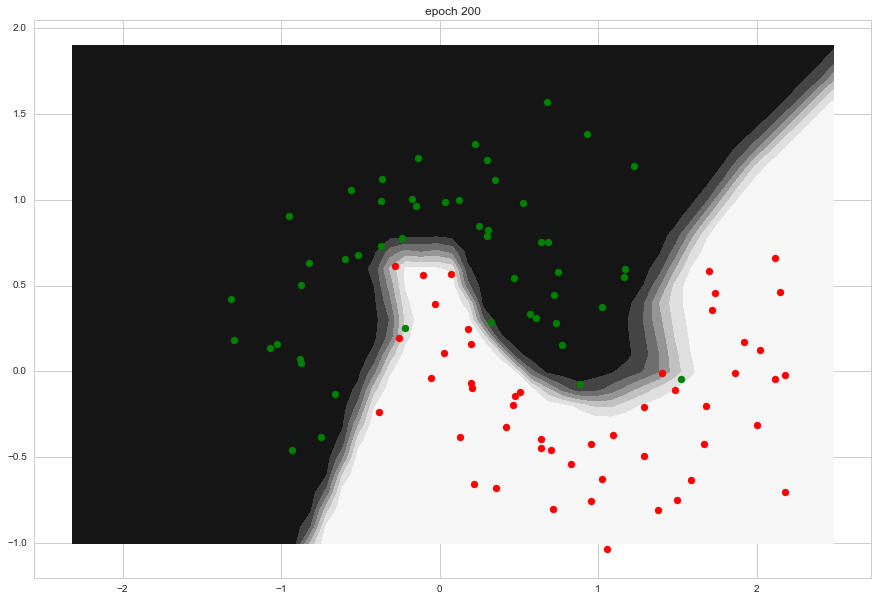

In [12]:
# fitting the model
model.fit(x, y, epochs=200, batch_size=100, verbose=0, callbacks=[plot_callback(lambda:updatePlot(model.predict(arr)))])

## L2 regulrisation

In [13]:
# implementing a NN in keras: 
# - input: (x,y) coordinates
# - 3 fully-connected layers (besides the input one)
# - L2 regularisation

model = Sequential()
model.add(Dense(20, activation='relu', input_dim=2))
model.add(Dense(30, activation='relu'))
model.add(Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.1)))

In [14]:
# addin an optimiser and compiling the model
adam = keras.optimizers.adam(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

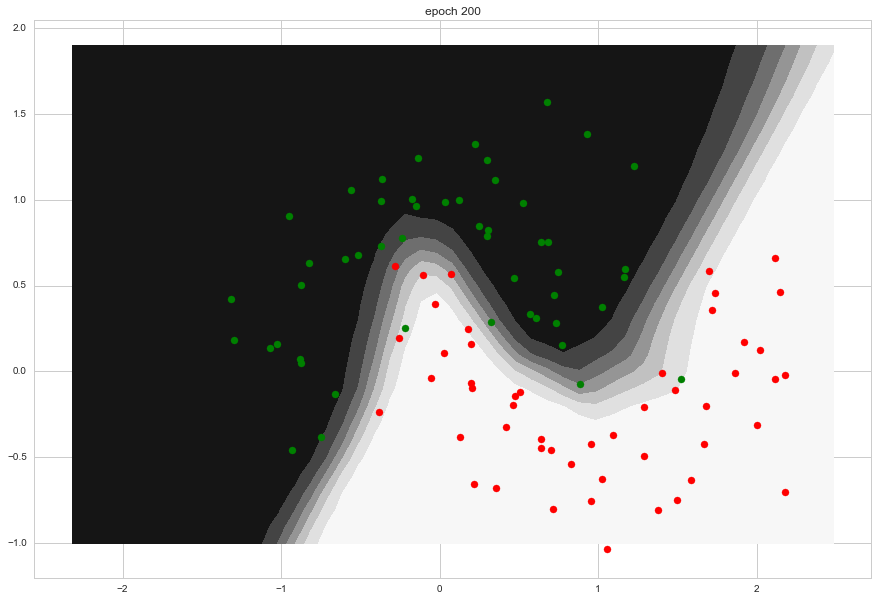

In [15]:
# fitting the model
model.fit(x, y, epochs=200, batch_size=100, verbose=0, callbacks=[plot_callback(lambda:updatePlot(model.predict(arr)))])

## Dropout

In [16]:
# implementing a NN in keras: 
# - input: (x,y) coordinates
# - 3 fully-connected layers (besides the input one)
# - Dropout after the 1st and t

model = Sequential()
model.add(Dense(20, activation='relu', input_dim=2))
model.add(Dropout(.3))
model.add(Dense(30, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(2, activation='softmax'))

In [17]:
# addin an optimiser and compiling the model
adam = keras.optimizers.adam(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

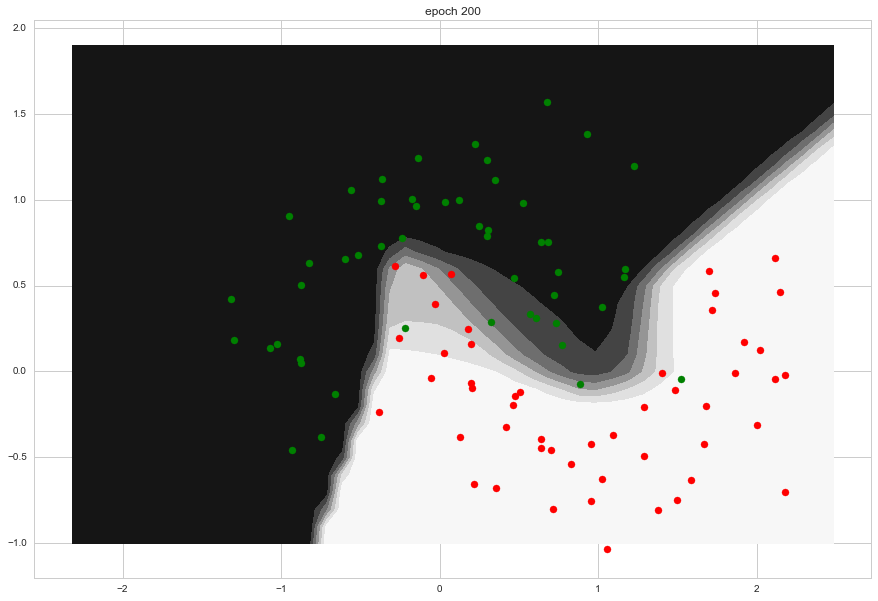

In [18]:
# fitting the model
model.fit(x, y, epochs=200, batch_size=100, verbose=0, callbacks=[plot_callback(lambda:updatePlot(model.predict(arr)))])

## Early stopping

In [19]:
# implementing a NN in keras: 
# - input: (x,y) coordinates
# - 3 fully-connected layers (besides the input one)
# - Early stopping as a regularisation approach (no changes in the network configuration)

model = Sequential()
model.add(Dense(20, activation='relu', input_dim=2))
model.add(Dense(30, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [20]:
# addin an optimiser and compiling the model
adam = keras.optimizers.adam(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

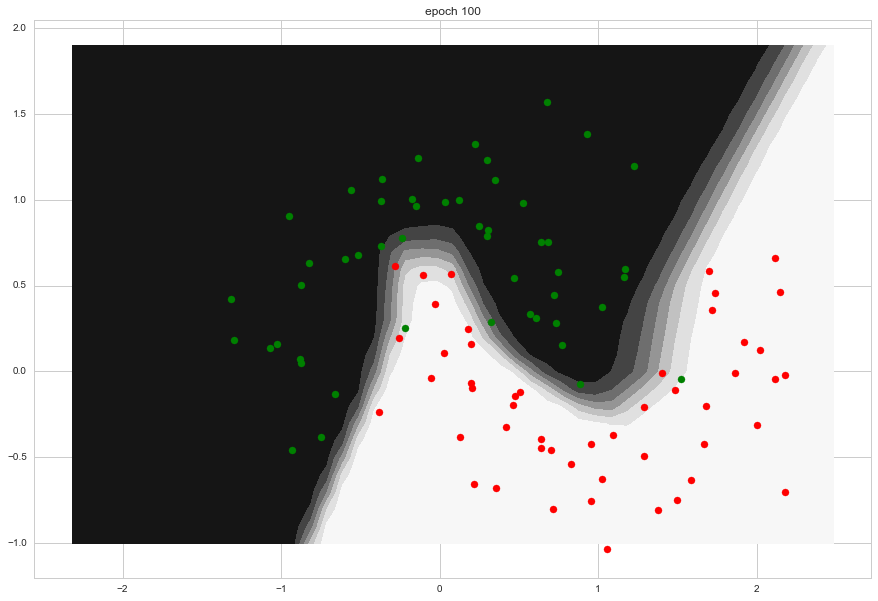

In [21]:
# fitting the model
model.fit(x, y, epochs=100, batch_size=100, verbose=0, callbacks=[plot_callback(lambda:updatePlot(model.predict(arr)))])